In [1]:
import numpy as np                  # Librería para operar matrices y vectores
import matplotlib.pyplot as plt     # Librería para graficar figuras
from keras.datasets import mnist    # Keras importa la base de datos MNIST
from keras.models import Sequential # Sequential sirve para declarar modelos neuronales
from keras.layers.core import Dense, Dropout, Activation # Funciones para declarar capas neuronales específicas 
from keras.utils import np_utils    # np_utils sirve para crear los vectores objetivo
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


Dimnesiones de X_train = (60000, 28, 28)
Dimensiones de y_train = (60000,)


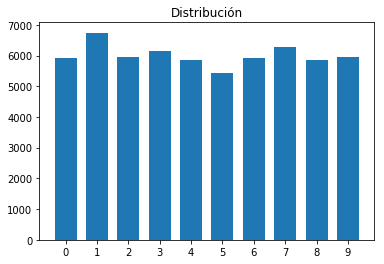

In [2]:
nb_classes = 10
# Base de datos MNIST: 60,000 ejemplos para entrenamiento y 10,000 ejemplos para verificación
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Dimnesiones de X_train =", X_train.shape)
print("Dimensiones de y_train =", y_train.shape)
plt.hist(y_train, bins=np.arange(-0.5,10.5,1.0), rwidth=0.7) 
plt.title("Distribución")
plt.xticks(range(10))
plt.show()

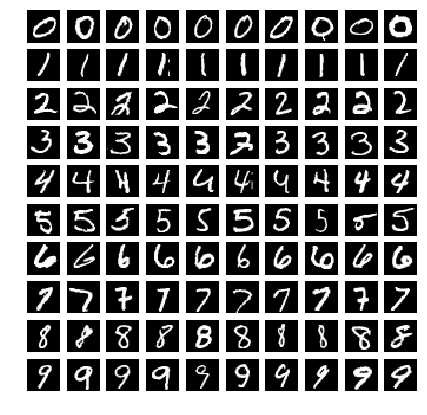

In [3]:
plt.rcParams['figure.figsize'] = (7,7) # Hacer las figuras más grandes

for i in range(10):
    index = np.where(y_train == i)
    index = index[0][np.random.randint(index[0].shape[0], size=10)]
    for j in range(10):
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(X_train[index[j]], cmap='gray', interpolation='none')
        plt.axis('off')
#plt.savefig('mnistnumbers5.pdf',bbox_inches='tight',dpi=300)
plt.show()


In [4]:
# Pre-Procesamiento
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255
print("Dimensiones de X_train =", X_train.shape)
print("Dimensiones de y_train =", X_test.shape)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

y_test

Dimensiones de X_train = (60000, 784)
Dimensiones de y_train = (10000, 784)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
# Modelos 
mlp3 = Sequential()
mlp3.add(Dense(512, use_bias=False, activation='relu', input_shape=(784,)))                      
mlp3.add(Dropout(0.4))   
mlp3.add(Dense(512, use_bias=False, activation='relu'))
mlp3.add(Dropout(0.4))
mlp3.add(Dense(10, use_bias=False, activation='softmax'))

In [59]:
tlp = Sequential()
tlp.add(Dense(300, use_bias=True, activation='tanh', input_shape=(784,)))
tlp.add(Dense(10, use_bias=True, activation='softmax'))

In [6]:
# Entrenamiento
model = mlp3
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='max', period=1)
h = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test), shuffle=True, callbacks=[checkpointer])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 0.3019 - acc: 0.9082 - val_loss: 0.1131 - val_acc: 0.9657

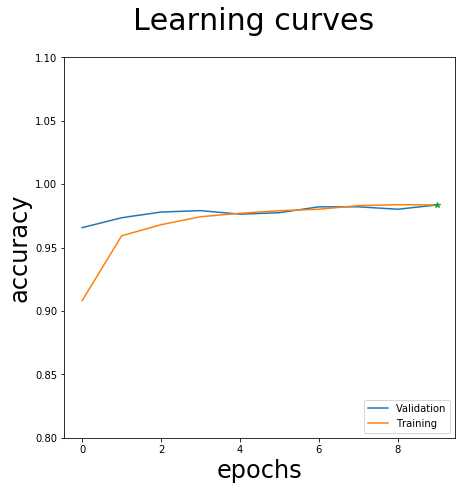

In [7]:
epoch_max = np.argmax(h.history['val_acc'])
plt.plot(h.history['val_acc'], label='Validation')
plt.plot(h.history['acc'], label='Training')
plt.legend(loc='lower right')
plt.plot(epoch_max, h.history['val_acc'][epoch_max],'*')
plt.xlabel('epochs', fontsize=24)
plt.ylabel('accuracy', fontsize=24)
plt.suptitle('Learning curves', fontsize=30)
axes = plt.gca()
axes.set_ylim([0.8,1.1])

#plt.savefig('accuracyVSunits/00ALTaccVSepochs.pdf', bbox_inches='tight')
plt.show()


In [8]:
# Evaluar modelo
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0562804610725
Test accuracy: 0.9836


In [55]:
# Evaluar el mejor modelo
model.load_weights("model.h5")
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0545549739879
Test accuracy: 0.9837


 9344/10000 [===========================>..] - ETA: 0s

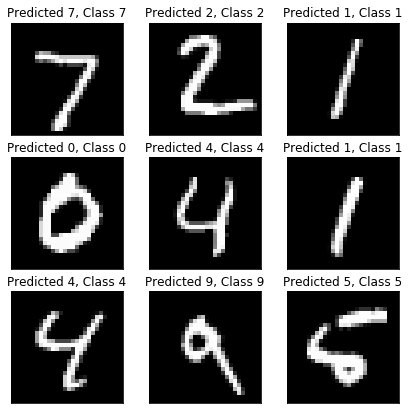

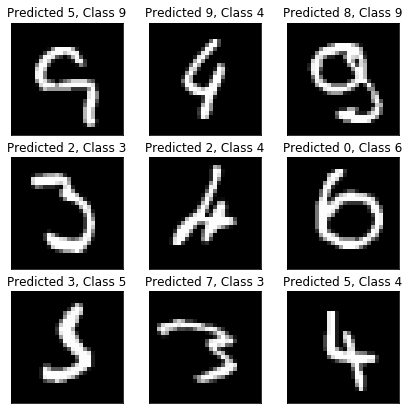

In [24]:
# Inspección visual de los errores
# Modificar este codigo
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
plt.figure()

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off') 

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off') 
    
plt.show()